# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd              #For data manipulation and analysis
import numpy as np               #For numerical computation and array Operation
import seaborn as sns            #For statistical data visualization
import matplotlib.pyplot as plt  #For creating static visualization
import warnings

warnings.filterwarnings('ignore') # Ignore Warnings messages during execution

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Displays the column names of the dataset
print(df.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [4]:
# Displays the data types of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Shows statistical summary (count, mean, std, etc.) for numeric columns
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
 #Counts the number of duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

In [7]:
# Plot the distribution of HeartDisease cases (0 = No, 1 = Yes)
df['HeartDisease'].value_counts()       

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

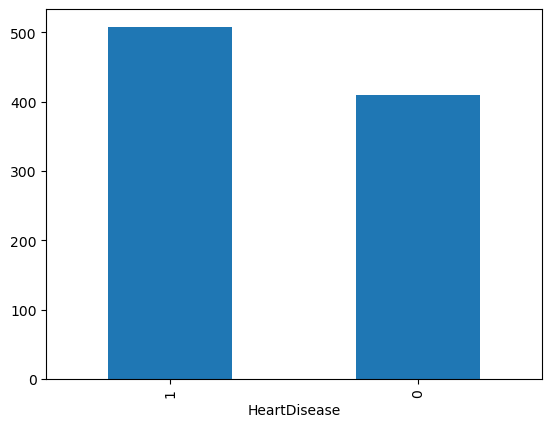

In [8]:
#Visualize the count of each class in the HeartDisease column using a bar chart
df['HeartDisease'].value_counts().plot(kind='bar') 

In [9]:
# Check for missing (null) values in the DataFrame
df.isnull().sum()                   

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

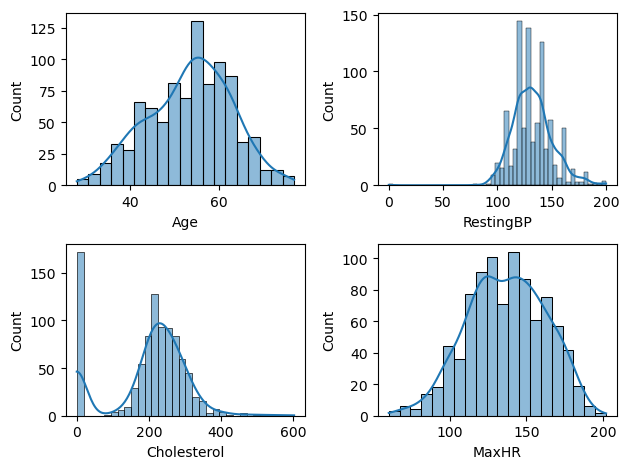

In [10]:
# Define a function to create a subplot with a histogram and KDE for a given variable
def plotting(var, num):
    plt.subplot(2, 2, num)              # Create a 2x2 grid of subplots and select position 'num'
    sns.histplot(df[var], kde=True)     # Plot histogram with KDE curve for the specified variable

# Call the plotting function for selected numerical columns
plotting('Age', 1)                      # Plot Age distribution
plotting('RestingBP', 2)                # Plot Resting Blood Pressure distribution
plotting('Cholesterol', 3)              # Plot Cholesterol distribution
plotting('MaxHR', 4)                    # Plot Maximum Heart Rate distribution

plt.tight_layout()                      # Adjust spacing between subplots to prevent overlap

In [11]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [12]:
#Calculate the mean cholesterol value excluding rows where Cholesterol is 0
ch_mean=df.loc[df['Cholesterol'] !=0,'Cholesterol'].mean()   
ch_mean          

np.float64(244.6353887399464)

In [13]:
# Replace 0 values in the Cholesterol column with the calculated mean
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean) 

# Round the Cholesterol values to 2 decimal places
df['Cholesterol'] = df['Cholesterol'].round(2)                         

In [14]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()     # Calculate mean excluding zero values
df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)          # Replace 0s with mean value
df['RestingBP'] = df['RestingBP'].round(2)                             # Round values to 2 decimal places


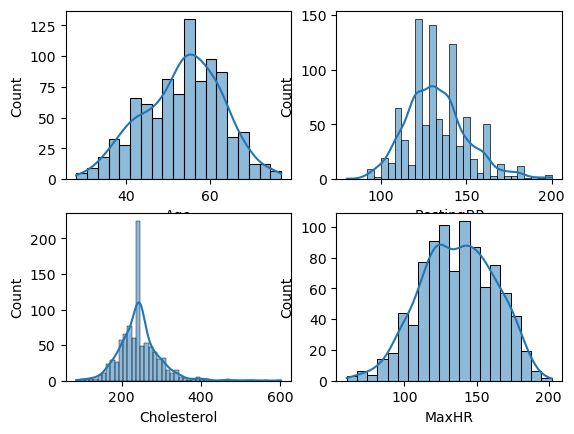

In [15]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

<Axes: xlabel='Sex', ylabel='count'>

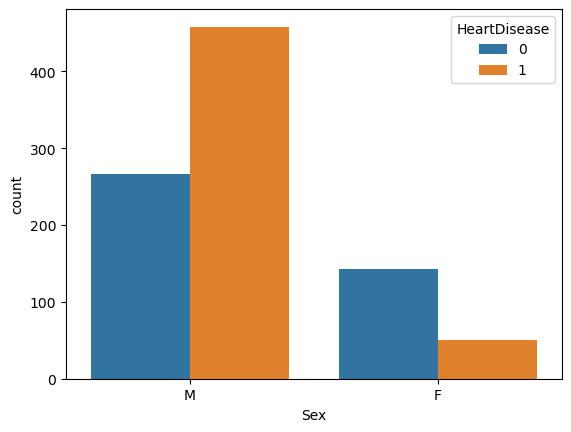

In [16]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

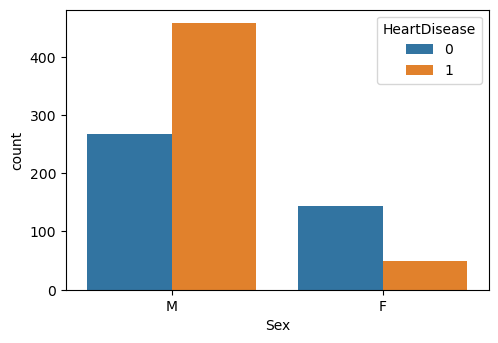

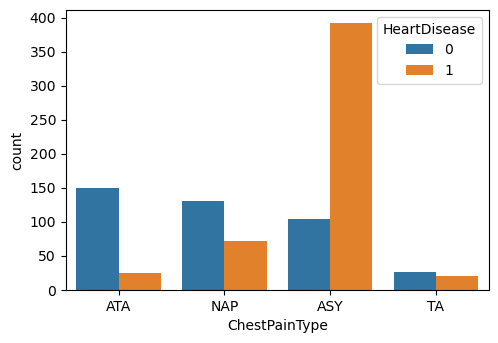

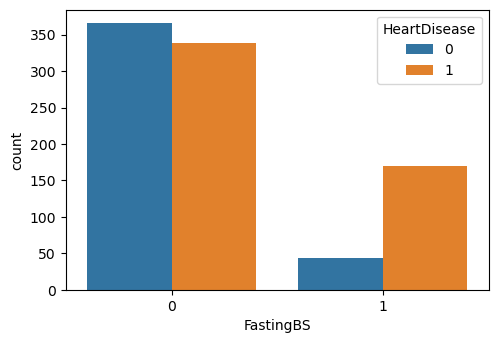

In [17]:
def plotting2(var, num):                                       # Define a function to create a countplot for a given variable
  plt.figure(figsize=(12, 8))                                  # Set the overall figure size (width x height)
  plt.subplot(2, 2, num)                                       # Create a 2x2 subplot grid and select the subplot position
  sns.countplot(x=df[var], hue=df['HeartDisease'])            # Plot count of the variable split by HeartDisease using Seaborn

plotting2('Sex', 1)                                            # Plot countplot for 'Sex'
plotting2('ChestPainType', 2)                                  # Plot countplot for 'ChestPainType'
plotting2('FastingBS', 3)                                      # Plot countplot for 'FastingBS'


<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

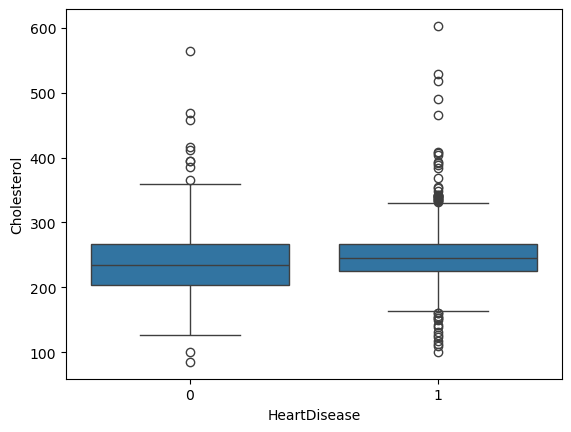

In [18]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)            # Visualize the distribution of Cholesterol for each HeartDisease class using a boxplot


<Axes: xlabel='HeartDisease', ylabel='Age'>

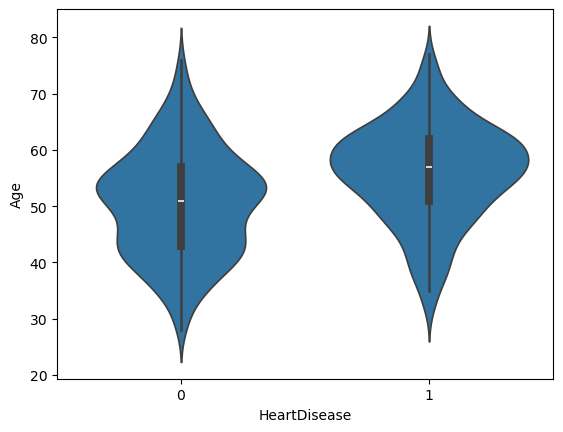

In [19]:
sns.violinplot(x='HeartDisease',y='Age',data=df)                     # Show the distribution and density of Age across HeartDisease classes using a violin plot

<Axes: >

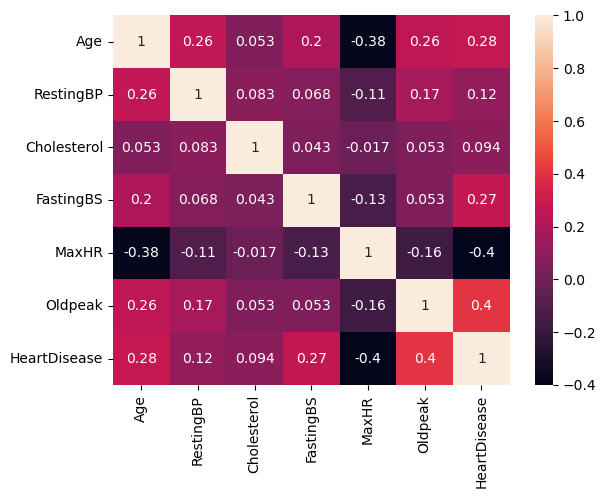

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True)           # Display a heatmap of correlation between numerical features with values shown

# Data Processing And Cleaning

In [25]:
df_encode = pd.get_dummies(df, drop_first=True)  #Converts categorical columns into dummy/one-hot encoded variables; drop_first=True
                                                 #avoids multicollinearity by dropping the first category of each variable 


In [26]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [27]:
from sklearn.preprocessing import StandardScaler
numerical_cols=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
scaler=StandardScaler()
df_encode[numerical_cols]=scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414853,0.832513,0,1.382928,-0.832432,0,True,True,False,False,True,False,False,False,True
1,-0.478484,1.527192,-1.212938,0,0.754157,0.105664,1,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.141317,0.719919,0,-1.525138,-0.832432,0,True,True,False,False,False,True,False,False,True
3,-0.584556,0.303619,-0.574908,0,-1.132156,0.574711,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.971022,-0.931454,0,-0.581981,-0.832432,0,True,False,True,False,True,False,False,False,True
